# Funding amount
Send Feedback
Given File 'startup_funding.csv'
Problem Statement :
Find out if cities play any role in receiving funding.
Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).
Print the city and percentage with 2 decimal place after rounding off.
Note:
Take city name "Delhi" as "New Delhi".
Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".
For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.
Print the city in descending order with respect to the percentage of funding.
Output Format :
city1 percent1
city2 percent2
city3 percent3
. . . 
. . .
. . .

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
startup = pd.read_csv("startup_funding.csv", encoding='latin1')
df = startup.copy()


In [55]:
df.dropna(subset = ["CityLocation"],inplace = True)
df.loc[df["CityLocation"]=="bangalore","CityLocation"]="Bangalore"
df.loc[df["CityLocation"]=="Delhi","CityLocation"]="New Delhi"
df.loc[df["AmountInUSD"].isnull(),"AmountInUSD"]= '0'
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000,NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,0,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,0,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000,NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000,NaN
...,...,...,...,...,...,...,...,...,...,...
2196,2196,29/04/2015,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,3500000,Series A
2197,2197,29/04/2015,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,0,NaN
2198,2198,29/04/2015,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,400000,NaN
2199,2199,29/04/2015,PiQube,Hiring Analytics platform,NaN,Chennai,The HR Fund,Seed Funding,500000,NaN


In [ ]:
new_startup =df["CityLocation"].str.split("/").str[0].str.strip()

In [25]:
city = new_startup.values
amount = df["AmountInUSD"].values
for i in range(len(amount)):
    amount[i] = ''.join(amount[i].split(','))


In [71]:
np_city = np.array(city)
np_amount = np.array(amount,dtype="int64")
City ={}
for i in range(len(np_city)):
    if np_city[i] in City:
        City[np_city[i]]+=np_amount[i]
    else:
        City[np_city[i]]=np_amount[i]
x =[]
y =[]
for key,values in City.items():
    x.append(key)
    y.append(values)
np_x = np.array(x)
np_y = np.array(y)
np_x = np_x[np.argsort(np_y)][::-1]
np_y = np.sort(np_y)[::-1]
np_x


array(['Bangalore', 'New Delhi', 'Mumbai', 'Gurgaon', 'Chennai', 'Pune',
       'Hyderabad', 'Noida', 'Ahmedabad', 'Jaipur', 'India', 'Chandigarh',
       'USA', 'Kolkata', 'Udupi', 'Vadodara', 'Singapore', 'Boston', 'US',
       'New York', 'SFO', 'Goa', 'Bhopal', 'Indore', 'Coimbatore',
       'Lucknow', 'Dallas', 'Gwalior', 'Panaji', 'Belgaum', 'Missourie',
       'Kanpur', 'Jodhpur', 'Trivandrum', 'Varanasi', 'Kerala', 'Kochi',
       'Karur', 'Siliguri', 'London', 'Seattle', 'Udaipur', 'Hubli',
       'Kozhikode', 'Surat', 'Nagpur', 'Agra'], dtype='<U10')

In [78]:
np_x = np_x[:10]
np_y =  np_y[:10]
sum_cities = np.sum(np_y)
for i in range(len(np_x)):
    percentage = (np_y[i] / sum_cities) * 100
    print(np_x[i], format(percentage, '.2f'))
    

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
startup = pd.read_csv("startup_funding.csv", encoding='latin1')
df = startup.copy()
df.dropna(subset = ["CityLocation"],inplace = True)
df.loc[df["CityLocation"]=="bangalore","CityLocation"]="Bangalore"
df.loc[df["CityLocation"]=="Delhi","CityLocation"]="New Delhi"
df.loc[df["AmountInUSD"].isnull(),"AmountInUSD"]= '0'
new_startup =df["CityLocation"].str.split("/").str[0].str.strip()
city = new_startup.values
amount = df["AmountInUSD"].values
for i in range(len(amount)):
    amount[i] = ''.join(amount[i].split(','))
np_city = np.array(city)
np_amount = np.array(amount,dtype="int64")
City ={}
for i in range(len(np_city)):
    if np_city[i] in City:
        City[np_city[i]]+=np_amount[i]
    else:
        City[np_city[i]]=np_amount[i]
x =[]
y =[]
for key,values in City.items():
    x.append(key)
    y.append(values)
np_x = np.array(x)
np_y = np.array(y)
np_x = np_x[np.argsort(np_y)][::-1]
np_y = np.sort(np_y)[::-1]
np_x = np_x[:10]
np_y =  np_y[:10]
sum_cities = np.sum(np_y)
for i in range(len(np_x)):
    percentage = (np_y[i] / sum_cities) * 100
    print(np_x[i], format(percentage, '.2f'))

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


# Investment Type
Send Feedback
Given File 'startup_funding.csv'
Problem Statement :
There are 4 different type of investments. Find out percentage of amount funded for each investment type.
Plot a pie chart to visualise.
Print the investment type and percentage of amount funded with 2 decimal places after rounding off.
Note :
Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.
Print the investment type in descending order with respect to the percentage of the amount funded.
Output Format :
investmentType1 percent1
investmentType2 percent2
investmentType3 percent3
. . . 

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
startup = pd.read_csv("startup_funding.csv", encoding='latin1')
df = startup.copy()
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [82]:
df["InvestmentType"].unique() # In order to find unique investment type from "InvestmentType"

array(['Private Equity', 'Seed Funding', 'Debt Funding', nan,
       'SeedFunding', 'PrivateEquity', 'Crowd funding', 'Crowd Funding'],
      dtype=object)

In [83]:
 "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding"

In [103]:
df.dropna(subset = ["InvestmentType"],inplace = True)
df.loc[df["InvestmentType"]=="PrivateEquity","InvestmentType"]="Private Equity"
df.loc[df["InvestmentType"]=="SeedFunding","InvestmentType"]="Seed Funding"
df.loc[df["InvestmentType"]=="Crowd funding","InvestmentType"]="Crowd Funding"
df.loc[df["AmountInUSD"].isnull(),"AmountInUSD"]= '0'
amount = df["AmountInUSD"].values
investment_type = df["InvestmentType"].values
for i in range(len(amount)):
    amount[i] = ''.join(amount[i].split(','))
np_amount = np.array(amount,dtype = "int64")
np_investment = np.array(investment_type)
Fund ={}
for i in range(len(np_amount)):
    if np_investment[i] in Fund:
        Fund[np_investment[i]]+=np_amount[i]
    else:
        Fund[np_investment[i]] = np_amount[i]
x=[]
y =[]
for key,values in Fund.items():
    x.append(key)
    y.append(values)
np_x = np.array(x)
np_y = np.array(y)
np_x = np_x[np.argsort(np_y)][::-1]
np_y = np.sort(np_y)[::-1]



array([18007085000,   332345708,     7800000,      155768], dtype=int64)

Crowd Funding 0.00
Debt Funding 0.04
Seed Funding 1.81
Private Equity 98.15


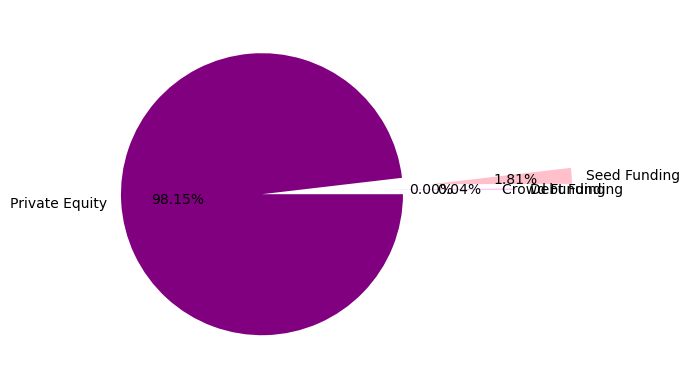

In [112]:
sum_fund = np.sum(np_y)
for i in range(len(np_x)):
    percentage = (np_y[i] / sum_fund) * 100
    print(np_x[i], format(percentage, '.2f'))

colors = ["blue","Magenta","Pink","Purple","Grey"]
explode=[0.0,0.2,0.6,0.6]
plt.pie(np_y,labels = np_x,colors = colors,explode=explode,autopct="%.2f%%")
plt.axis("equal") # In order to give it a circle look for pie chart
plt.show()
    

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


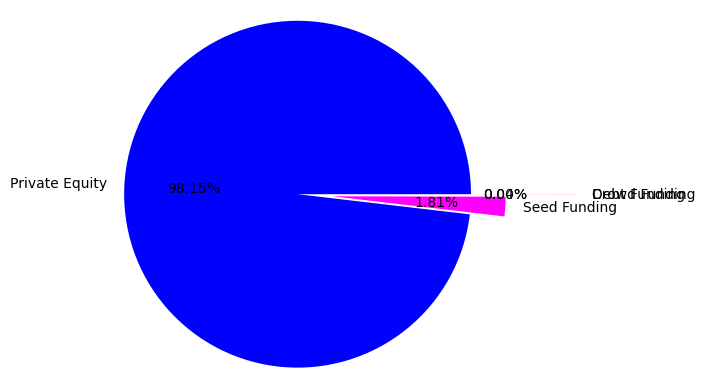

In [113]:
df.dropna(subset = ["InvestmentType"],inplace = True)
df.loc[df["InvestmentType"]=="PrivateEquity","InvestmentType"]="Private Equity"
df.loc[df["InvestmentType"]=="SeedFunding","InvestmentType"]="Seed Funding"
df.loc[df["InvestmentType"]=="Crowd funding","InvestmentType"]="Crowd Funding"
df.loc[df["AmountInUSD"].isnull(),"AmountInUSD"]= '0'
amount = df["AmountInUSD"].values
investment_type = df["InvestmentType"].values
for i in range(len(amount)):
    amount[i] = ''.join(amount[i].split(','))
np_amount = np.array(amount,dtype = "int64")
np_investment = np.array(investment_type)
Fund ={}
for i in range(len(np_amount)):
    if np_investment[i] in Fund:
        Fund[np_investment[i]]+=np_amount[i]
    else:
        Fund[np_investment[i]] = np_amount[i]
x=[]
y =[]
for key,values in Fund.items():
    x.append(key)
    y.append(values)
np_x = np.array(x)
np_y = np.array(y)
np_x = np_x[np.argsort(np_y)][::-1]
np_y = np.sort(np_y)[::-1]
sum_fund = np.sum(np_y)
for i in range(len(np_x)):
    percentage = (np_y[i] / sum_fund) * 100
    print(np_x[i], format(percentage, '.2f'))

colors = ["blue","Magenta","Pink","Purple","Grey"]
explode=[0.0,0.2,0.6,0.6]
plt.pie(np_y,labels = np_x,colors = colors,explode=explode,autopct="%.2f%%")
plt.axis("equal") # In order to give it a circle look for pie chart
plt.show()

In [114]:
Fund

{'Private Equity': 18007085000,
 'Seed Funding': 332345708,
 'Debt Funding': 7800000,
 'Crowd Funding': 155768}

In [125]:
df.dropna(subset = ["InvestmentType"],inplace = True)
df.loc[df["InvestmentType"]=="PrivateEquity","InvestmentType"]="Private Equity"
df.loc[df["InvestmentType"]=="SeedFunding","InvestmentType"]="Seed Funding"
df.loc[df["InvestmentType"]=="Crowd funding","InvestmentType"]="Crowd Funding"
df.loc[df["AmountInUSD"].isnull(),"AmountInUSD"]= '0'
amount = df["AmountInUSD"].values
investment_type = df["InvestmentType"].values
for i in range(len(amount)):
    amount[i] = ''.join(amount[i].split(','))
df["AmountInUSD"]=amount.astype(int)

df["InvestmentType"].value_counts()
df.groupby("InvestmentType")["AmountInUSD"].sum()

InvestmentType
Crowd Funding          155768
Debt Funding          7800000
Private Equity    18007085000
Seed Funding        332345708
Name: AmountInUSD, dtype: int64